In [1]:
!pip install unidecode

     |████████████████████████████████| 245kB 2.7MB/s 


In [15]:
import unidecode
import string
import random
import re

all_characters = string.printable
n_characters = len(all_characters)

file = unidecode.unidecode(open('/content/input.txt').read())
file_len = len(file)
print('file_len =', file_len)

file_len = 9707


In [17]:

chunk_len = 100

def random_chunk():
    start_index = random.randint(0, file_len - chunk_len)
    end_index = start_index + chunk_len + 1
    return file[start_index:end_index]

print(random_chunk())

 cer a lui aripe, Si cai de mii de ani treceau In tot atatea clipe. Un cer de stele dedesubt, Deasupr


In [0]:
import torch
import torch.nn as nn

class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, n_layers=1):
        super(RNN, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.n_layers = n_layers
        
        self.encoder = nn.Embedding(input_size, hidden_size) # We use embeddings instead of one-hot encoding
        self.gru = nn.RNN(hidden_size, hidden_size, n_layers) # RNN network 
        self.decoder = nn.Linear(hidden_size, output_size) # Linear output layer
    
    def forward(self, input, hidden):
        input = self.encoder(input.view(1, -1))
        output, hidden = self.gru(input.view(1, 1, -1), hidden)
        output = self.decoder(output.view(1, -1))
        return output, hidden

    def init_hidden(self):
        return torch.zeros(self.n_layers, 1, self.hidden_size) # we initialize the first hidden stat with zeros

In [19]:
def char_tensor(string):
    tensor = torch.zeros(len(string)).long()
    for c in range(len(string)):
        tensor[c] = all_characters.index(string[c])
    return tensor

print(char_tensor('abcDEF'))

tensor([10, 11, 12, 39, 40, 41])


In [0]:
def random_training_set():    
    chunk = random_chunk()
    inp = char_tensor(chunk[:-1])
    target = char_tensor(chunk[1:])
    return inp, target

In [21]:
random_training_set()

(tensor([29, 27, 10, 31, 14, 35, 18, 18, 94, 40, 94, 10, 21, 11, 10, 94, 12, 10,
         94, 13, 14, 94, 12, 14, 10, 27, 10, 94, 74, 94, 56, 23, 94, 22, 24, 27,
         29, 94, 15, 27, 30, 22, 24, 28, 94, 12, 30, 94, 24, 12, 17, 18, 18, 94,
         31, 18, 18, 94, 38, 14, 94, 28, 12, 10, 23, 29, 14, 18, 14, 74, 23, 94,
         10, 15, 10, 27, 10, 75, 94, 74, 94, 39, 18, 23, 94, 28, 15, 14, 27, 10,
         94, 22, 14, 10, 94, 31, 14, 23, 18, 18]),
 tensor([27, 10, 31, 14, 35, 18, 18, 94, 40, 94, 10, 21, 11, 10, 94, 12, 10, 94,
         13, 14, 94, 12, 14, 10, 27, 10, 94, 74, 94, 56, 23, 94, 22, 24, 27, 29,
         94, 15, 27, 30, 22, 24, 28, 94, 12, 30, 94, 24, 12, 17, 18, 18, 94, 31,
         18, 18, 94, 38, 14, 94, 28, 12, 10, 23, 29, 14, 18, 14, 74, 23, 94, 10,
         15, 10, 27, 10, 75, 94, 74, 94, 39, 18, 23, 94, 28, 15, 14, 27, 10, 94,
         22, 14, 10, 94, 31, 14, 23, 18, 18, 94]))

In [0]:
# Temperature is a variable that controls the randomness of the selection process from the multinomial distribution

def evaluate(prime_str='A', predict_len=100, temperature=0.8):
    hidden = decoder.init_hidden()
    prime_input = char_tensor(prime_str)
    predicted = prime_str

    # Use priming string to "build up" hidden state
    for p in range(len(prime_str) - 1):
        _, hidden = decoder(prime_input[p], hidden)
    inp = prime_input[-1]
    
    for p in range(predict_len):
        output, hidden = decoder(inp, hidden)
        
        # Sample from the network as a multinomial distribution
        output_dist = output.data.view(-1).div(temperature).exp()
        top_i = torch.multinomial(output_dist, 1)[0]
        
        # Add predicted character to string and use as next input
        predicted_char = all_characters[top_i]
        predicted += predicted_char
        inp = char_tensor(predicted_char)

    return predicted

In [0]:
import time, math

def time_since(since):
    s = time.time() - since
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)

In [0]:
def train(inp, target):
    hidden = decoder.init_hidden()
    decoder.zero_grad()
    loss = 0

    for c in range(chunk_len):
        output, hidden = decoder(inp[c], hidden)
        loss += criterion(output, target[c].unsqueeze(0))

    loss.backward()
    decoder_optimizer.step()

    return loss.data.item() / chunk_len

In [25]:
n_epochs = 20000
print_every = 100
plot_every = 10
hidden_size = 100
n_layers = 1
lr = 0.005

decoder = RNN(n_characters, hidden_size, n_characters, n_layers)
decoder_optimizer = torch.optim.Adam(decoder.parameters(), lr=lr)
criterion = nn.CrossEntropyLoss()

start = time.time()
all_losses = []
loss_avg = 0

for epoch in range(1, n_epochs + 1):
    loss = train(*random_training_set())       
    loss_avg += loss

    if epoch % print_every == 0:
        print('[%s (%d %d%%) %.4f]' % (time_since(start), epoch, epoch / n_epochs * 100, loss))
        print(evaluate('Wh', 100), '\n')

    if epoch % plot_every == 0:
        all_losses.append(loss_avg / plot_every)
        loss_avg = 0

 4s (100 0%) 2.2216]
Whin fi cu cere moi porarige oti ee; Eli pun Oor Co dertea nu ca cor fas cat i-n eu tot ilborite antra 

 9s (200 1%) 2.2164]
Whprane, Ste mai far viaran nu in ca ce tate-ne-i firandecultata- re prea zinde vint cepe in cazandeda 

 14s (300 1%) 1.9226]
Whi ea tatatile sn par de-ncul Pici e, cu de radea de. Eu cativam asa strusuple, In basa, Si stit se s 

 19s (400 2%) 2.1060]
Whi a chiti Cota Si poste; Te-nt penere-i fepa ce-a tolc deci au ei fat ce-nchea sege; Sa-oruli mere-o 

 24s (500 2%) 1.6574]
Whi treme; Cuceapda plat cu ochipbe in moari mari Lunestars, Tes nostale pot loarore, Si ea si vi fre- 

 29s (600 3%) 1.8379]
Whi, Din se streu rocul, Ei vreand Dar la namanta fosoara, Pasa necetul. In faptul. Cala ce ascu de va 

 34s (700 3%) 1.7200]
While si mea cu rucerind inispea au cumpe, Ei sund inemuna; Eima; Ed poarine, Panar el estinga, Ding p 

 39s (800 4%) 1.6454]
Whi, Dar de-ai drate cu frumand Si altei de rupta pasatul isc dus, Catale ca capte si veng 

IndexError: ignored

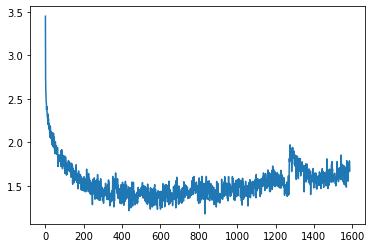

In [26]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

plt.figure()
plt.plot(all_losses)

In [27]:
print(evaluate('Pe sufletele ', 200, temperature=0.5))

Pe sufletele pin cand dulce ca doi de sosi subirii sus, Ca dor dor de sunt din cefea vin, E umbra dor de umple. O, vinistele-i sa moata. Ca dezlege. O, lot pierea Cand sara-n vii num-nsa-l vintu-ncheamanda fetele:


In [28]:
print(evaluate('Th', 200, temperature=0.2))

Thisuri, Ca dor de se pasa fugi Pe ce vinii se fara sa sa trea Ca de se notoar de se pasa sa sus, In vin cea de se nu vind si de se potii, Ca dorind din ceal de sus, In vin cea de se nu sa se pind sa su


In [29]:

print(evaluate('Th', 200, temperature=1))

Thisurioarul moarde. - Dorul ti se rotii cuntieA cin caui abateul: i rasu-ntosept, Estiu albine, ga, gin pobori in se-ndral pe-nchei ma dor din pasat sa dup, Cimi se findramind de-nchei, Si dauprit unda
